# Chapter 2: Getting Started with Prophet

## Building a simple model in Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df = pd.read_csv('../data/co2-ppm-daily_csv.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

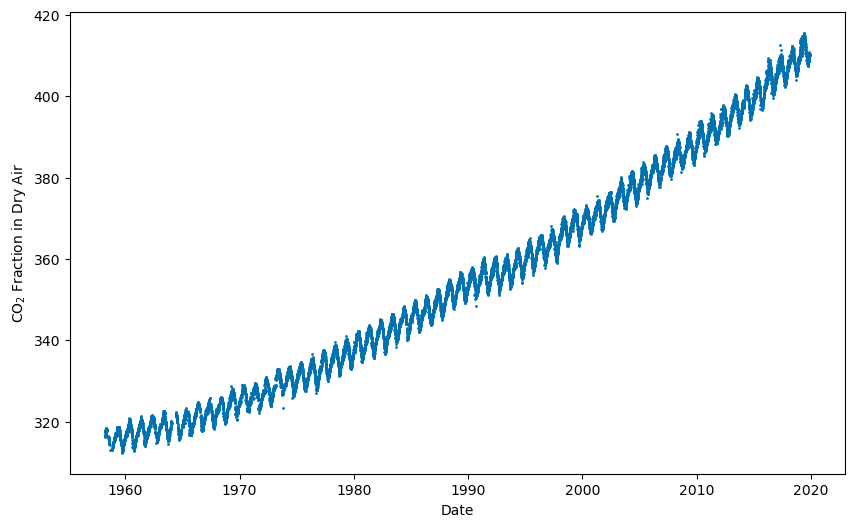

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], s=1, c='#0072B2')
plt.xlabel('Date')
plt.ylabel(r'CO$_2$ Fraction in Dry Air')
plt.show()

In [4]:
model = Prophet()
model.fit(df)

11:02:56 - cmdstanpy - INFO - Chain [1] start processing
11:03:16 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model.make_future_dataframe(periods=365 * 10)
forecast = model.predict(future)

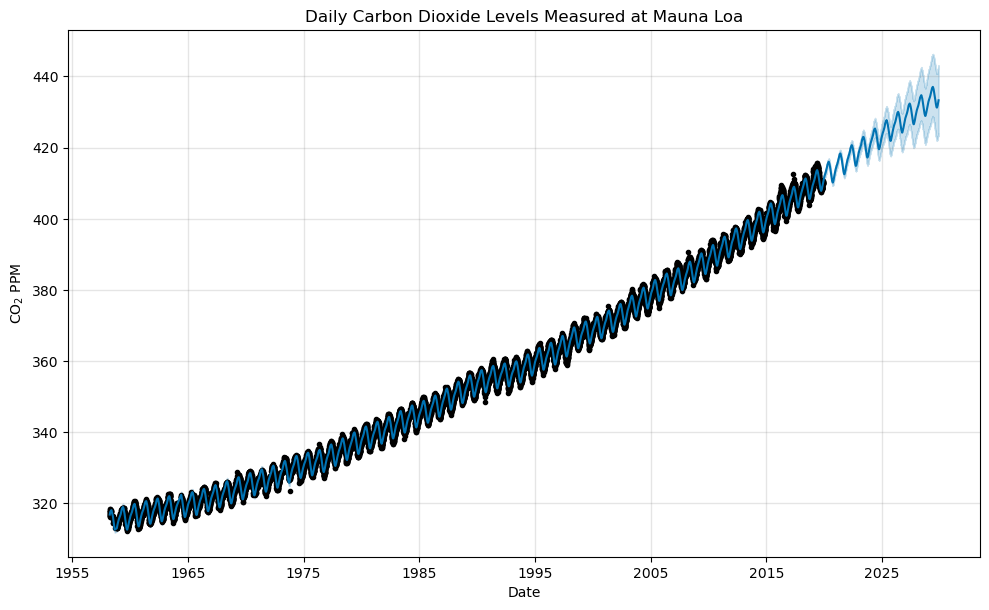

In [6]:
fig = model.plot(forecast, xlabel='Date', ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

## Interpreting the forecast DataFrame

In [7]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.87681,314.879212,314.884015
yhat_lower,316.026642,316.079937,316.153113
yhat_upper,317.726869,317.789381,317.876506
trend_lower,314.87681,314.879212,314.884015
trend_upper,314.87681,314.879212,314.884015
additive_terms,1.985679,2.015663,2.118861
additive_terms_lower,1.985679,2.015663,2.118861
additive_terms_upper,1.985679,2.015663,2.118861
weekly,0.003257,-0.010815,0.003454


## Understanding components plots

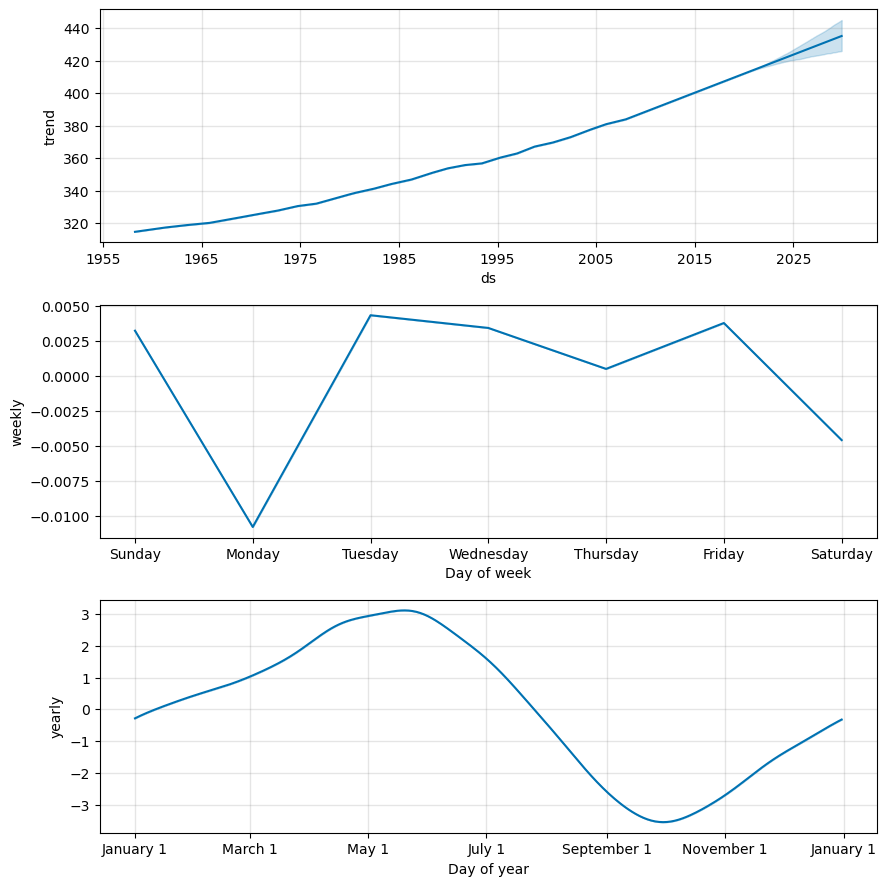

In [8]:
fig2 = model.plot_components(forecast)
plt.show()